Problem 1 - Data Read, Write and Inspect:
1. Load the provided dataset and import in pandas DataFrame.

In [2]:
from google.colab import files
import pandas as pd
import io
uploaded=files.upload()

Saving bank.csv to bank.csv


In [3]:
df = pd.read_csv("bank.csv")

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.

In [4]:
print("\nDataFrame Info:")
df.info()

object_columns = df.select_dtypes(include='object').columns
print("\n(a) Columns with dtype=object:")
print(object_columns)




DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

(a) Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', '

In [5]:
print("\n(b) Unique values of object columns:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")


(b) Unique values of object columns:
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [6]:
print("\n(c) Total number of null values in each column:")
print(df.isnull().sum())


(c) Total number of null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [7]:
df_numeric = df.select_dtypes(exclude='object')

df_numeric.to_csv("banknumericdata.csv", index=False)
print("\nNumeric DataFrame saved as 'banknumericdata.csv'")


Numeric DataFrame saved as 'banknumericdata.csv'


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [8]:
df_numeric_read = pd.read_csv("banknumericdata.csv")

print("\nSummary statistics of numeric data:")
print(df_numeric_read.describe())


Summary statistics of numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [9]:
uploaded=files.upload()

Saving medical_students_dataset.csv to medical_students_dataset.csv


In [10]:
df = pd.read_csv("medical_students_dataset.csv")
print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


2. Check info of the DataFrame and identify column with missing (null) values.

In [11]:
df.info()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BM

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

/tmp/ipython-input-3657246551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [14]:
df['Height'].fillna(df['Height'].median(), inplace=True)

/tmp/ipython-input-2987394136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(df['Height'].median(), inplace=True)


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [15]:
print("Duplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

Duplicate rows: 8506


In [16]:
print(df.isnull().sum())
print("Duplicate rows after cleaning:", df.duplicated().sum())

Student ID        19880
Age                   0
Gender                0
Height                0
Weight            19895
Blood Type        19899
BMI               19891
Temperature       19900
Heart Rate        19890
Blood Pressure    19883
Cholesterol       19882
Diabetes          19898
Smoking           19884
dtype: int64
Duplicate rows after cleaning: 0


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [17]:
uploaded=files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [19]:
df = pd.read_csv("Titanic-Dataset.csv")
df_sub = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]


fare_mean = df_first_class['Fare'].mean()
fare_median = df_first_class['Fare'].median()
fare_max = df_first_class['Fare'].max()
fare_min = df_first_class['Fare'].min()

print("Mean Fare:", fare_mean)
print("Median Fare:", fare_median)
print("Maximum Fare:", fare_max)
print("Minimum Fare:", fare_min)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [20]:
null_age_count = df_sub['Age'].isnull().sum()
print("Number of null values in Age column:", null_age_count)

df_sub_clean = df_sub.dropna(subset=['Age'])

print("Number of rows after dropping null Age values:", len(df_sub_clean))

Number of null values in Age column: 177
Number of rows after dropping null Age values: 714


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [21]:
df = pd.read_csv("Titanic-Dataset.csv")

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, embarked_dummies], axis=1)

df.drop('Embarked', axis=1, inplace=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


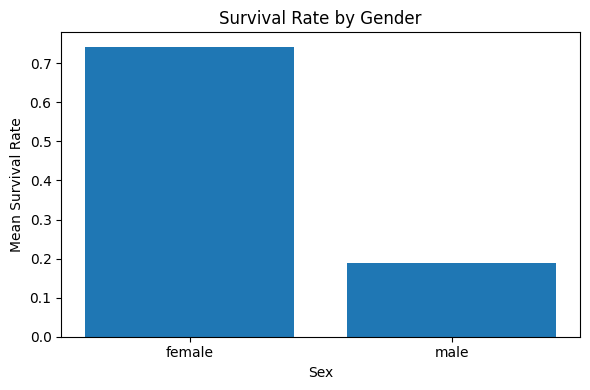

In [22]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# 1. Calculate mean survival rate for each gender
mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

plt.figure(figsize=(6,4))
plt.bar(mean_survival.index, mean_survival.values)
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.tight_layout()
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


/tmp/ipython-input-1576569581.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


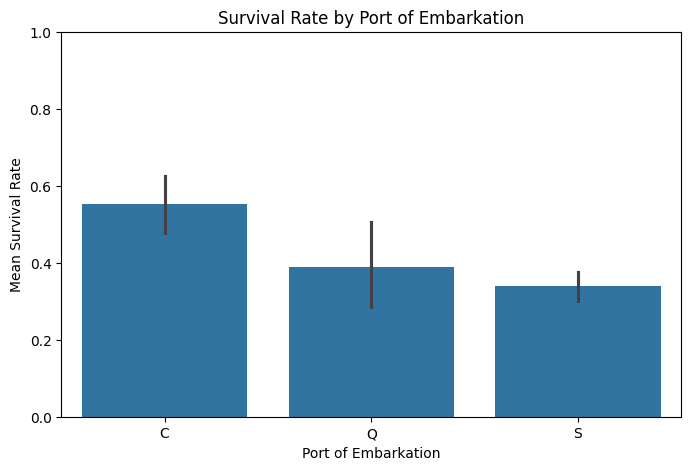

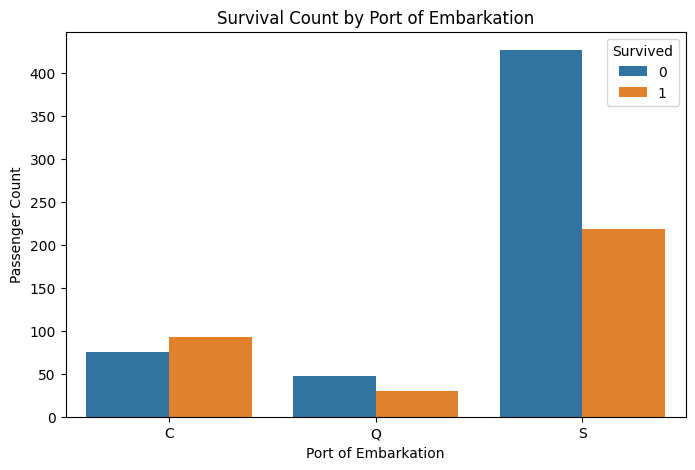

In [23]:
import seaborn as sns
df = pd.read_csv("Titanic-Dataset.csv")


df['Embarked'].fillna('S', inplace=True)

survival_by_port = df.groupby('Embarked')['Survived'].mean().reset_index()
print(survival_by_port)

plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', data=df, order=['C','Q','S'])
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue='Survived', data=df, order=['C','Q','S'])
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger Count')
plt.show()